IMPORTS, CONSTANTS, AND BASIC SETUP

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


alpha = 1.5
beta = 1.1
gamma = 2.5
delta = 1.4
kappa = 0.5

numX1Pts = 30
numX2Pts = 30 

x1Range = np.linspace(start=0, stop=5, num=numX1Pts)
x2Range = np.linspace(start=0, stop=5, num=numX2Pts)
tRange = np.linspace(start=0, stop=20, num=2000)

x1, x2 = np.meshgrid(x1Range, x2Range)



CREATING VECTOR FIELD

In [109]:
def dx1dt(x1, x2) -> float:
    return -alpha * x1 + beta * x1 * x2

def dx2dt(x1, x2) -> float: 
    return gamma * (1 - kappa * x2) * x2 - delta * x1 * x2

u = dx1dt(x1, x2)
v = dx2dt(x1, x2)




GETTING NULLCLINES AND EQUILIBRIUM POINTS

In [ ]:
#v-nullcline 1: x1 = 0
v_nullcline_1 = [np.zeros(shape=(numX1Pts,)), x2Range]


#v-nullcline 2: x2 = alpha / beta
v_nullcline_2 = [x1Range, np.full((numX2Pts,), alpha/beta)]

#h-nullcline 1: x2=0
h_nullcline_1 = [x1Range, np.zeros(shape=numX2Pts)]

#h-nullcline 2: x2 = 1 / kappa - (delta * x1) / (gamma * kappa) 
x2_vals = []
for x1_v in x1Range:
    x2_vals.append(1 / kappa - (delta * x1_v) / (gamma * kappa))

h_nullcline_2 = [x1Range, x2_vals]

eq_points_x1 = [0, 0, ((alpha / beta) - (1 / kappa)) * -gamma * kappa / delta]
eq_points_x2 = [0, 1 / kappa, alpha / beta]

print(eq_points_x1[2])
print(eq_points_x2[2])



0.5681818181818183
1.3636363636363635
2.0


In [111]:

def dSdt(t : float, S : tuple):
    x1, x2 = S
    return [dx1dt(x1, x2), dx2dt(x1,x2)]

init_1 = (5, 1)
init_2 = (1, 5)

S_0 = odeint(dSdt, y0=init_1, t=tRange, tfirst = True)
x1_0 = S_0.T[0] 
x2_0 = S_0.T[1]

S_1 = odeint(dSdt, y0=init_2, t=tRange, tfirst=True)
x1_1 = S_1.T[0]
x2_1 = S_1.T[1]

PLOTTING GRAPHS

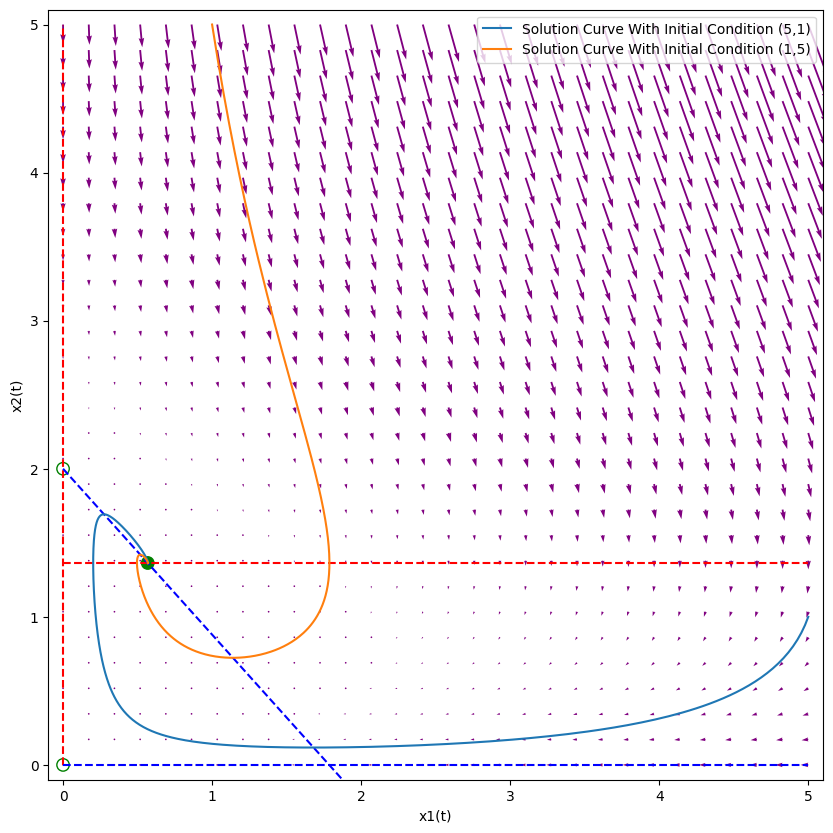

In [112]:
plt.figure(figsize=(10, 10))
plt.quiver(x1, x2, u, v, color = 'purple')

plt.xlabel("x1(t)")
plt.ylabel("x2(t)")

plt.scatter(x=eq_points_x1, y=eq_points_x2, s=80, facecolors=['none', 'none', 'green'], edgecolors='green')

plt.plot(v_nullcline_1[0], v_nullcline_1[1], color='r', linestyle='--')
plt.plot(v_nullcline_2[0], v_nullcline_2[1], color='r', linestyle='--')

plt.plot(h_nullcline_1[0], h_nullcline_1[1], color='b', linestyle='--')
plt.plot(h_nullcline_2[0], h_nullcline_2[1], color='b', linestyle='--')

plt.xlim((-0.1,5.1))
plt.ylim((-0.1,5.1))

plt.plot(x1_0, x2_0, label='Solution Curve With Initial Condition (5,1)')
plt.plot(x1_1, x2_1, label='Solution Curve With Initial Condition (1,5)')

plt.legend(loc="upper right")

plt.show()

Observing the plot above, we clearly can tell that the only stable equilibrium point of this system is at (0.5618, 1.3636) and that the other equilibrium points (0, 0), and (0, 2) are unstable equilibria. Because of this, our solution curves tend to the stable equilibrium point and curve away from the unstable equilibria. In the plot we see, that both solution curves, regardless of their differing initial conditions, follow the direction of the given vector field and end up at the stable equilibrium point.

1.3636494583958352
0.5681291600045411


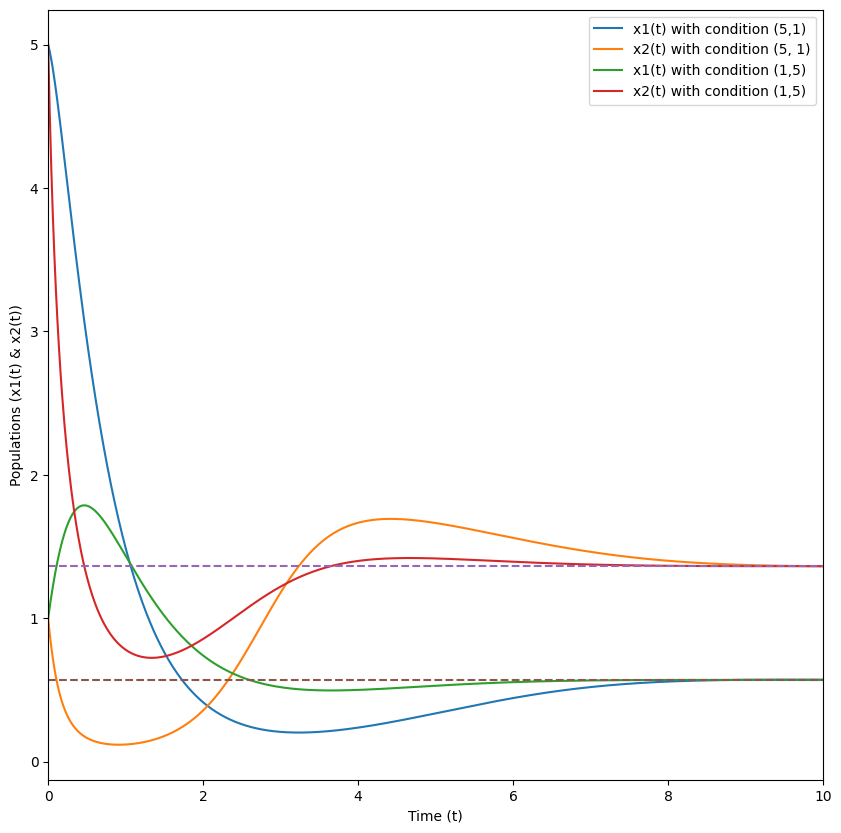

In [122]:
plt.figure(figsize=(10,10))

plt.xlabel("Time (t)")
plt.ylabel("Populations (x1(t) & x2(t))")

plt.xlim(0, 10)

plt.plot(tRange, x1_0, label='x1(t) with condition (5,1)')
plt.plot(tRange, x2_0, label='x2(t) with condition (5, 1)')
plt.plot(tRange, x1_1, label='x1(t) with condition (1,5)')
plt.plot(tRange, x2_1, label='x2(t) with condition (1,5)')

plt.plot(tRange, np.full((2000,), x2_1[1500]), linestyle='--')
plt.plot(tRange, np.full((2000,), x1_0[1500]), linestyle='--')

print(x2_1[1500])
print(x1_0[1500])


plt.legend(loc="upper right")

#plt.legend(['x1(t) with point (5, 1)', 'x2(t)', 'hihihi', 'hihihihi'], loc='upper right')

All solution curves depicted show asymptotic behavior. x2(t) with the initial condition of (5, 1) and x2(t) with the initial condition of (1, 5) both share a horizontal asymptote at around t = 1.3636. x1(t) with the initial condition of (5, 1) and x1(t) with the initial condition of (1, 5) both share a different horizontal asymptote at around t = 0.568. 

All the curves share the behavior that if they are below or above their respective asymptote, the population will "adjust" itself to reach that state of equilibrium. For example both the blue curve and red curve above start high above their states of equilibria respectively and so they decrease quite rapidly until they go under the state of equilibrium and then "correct" themselves back to stability. The green curve does something similar as it starts out above it's equilibrium state, but it does increase at first and then quickly decreases back to stability. The orange curve starts out below it's equilibrium population and decreases until around t = 2 where it rebounds and increases back up to stability.